# Common Probability Distributions

**Learning Objectives:** Learn about different discrete and continuous probability distributions and how to draw samples from them in Python.

## Imports

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from ipywidgets import interact, fixed

In [4]:
import altair as alt

## 1 Discrete probability distributions

### 1.1 Bernoulli distribution

The [Bernoulli distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution) is used to model categorical data that has two possible outcomes, usually referred to *success* and *failure*. This type of process is called a *Bernoulli trial*. Here is a short summary of the properties of the Bernoulli distribution:

* $x \sim B(p)$
* $p$ is the probability of *success*, $q=1-p$ the probability of *failure*
* $x \in \{success, failure\}$

In practice, the *success* and *failure* outcomes can be any categorical values.

Some examples:

* Tossing a coin (`H` or `T`)
* Mobile phones operating systems (`iOS` or `Android`)
* Students Passing or failing a test

The function `np.random.choice` can be used to draw samples from the Bernoulli distribution.

Here are 10 Bernoulli trials with outcomes of `0/1` of equal probability:

In [5]:
x = np.random.choice([0,1], 10)
x

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 0])

Any set of values can be used for the outcomes:

In [9]:
x = np.random.choice(['H','T'], 10)
x

array(['T', 'T', 'H', 'H', 'H', 'T', 'H', 'H', 'H', 'H'], 
      dtype='<U1')

An effective way of visualizing such categorical data is using a bar plot:

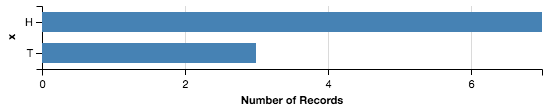

In [10]:
alt.Chart(pd.DataFrame(dict(x=x))).mark_bar().encode(
    y='x',
    x='count(*)'
)

The Bernoulli distribution also allows the probabilities of the two outcomes to be unequal. However, the probabilities of the two outcomes have to sum to $1.0$.

Here is a generative model that uses a Bernoulli random variable to simulate phone ownership:

* `iOS` with probability $p$
* `Android` with probability $q=1-p$:

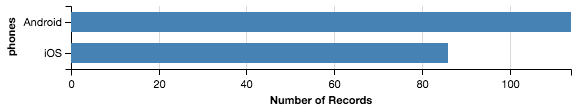

In [11]:
p = 0.4
phones = np.random.choice(['iOS', 'Android'], 200, p=(p,1-p))
phones_df = pd.DataFrame(dict(phones=phones))
alt.Chart(phones_df).mark_bar().encode(
    y = 'phones',
    x = 'count(*)'
)

It is important to emphasize again that a finite number of samples does not give the inforamtion about the true PMF. We can get an **estimate** of the the $p$ and $q$ parameters as follows:

In [12]:
phones_df.phones.value_counts(normalize=True)

Android    0.57
iOS        0.43
Name: phones, dtype: float64

### 1.2 Categorical distribution

The [categorical distribution](https://en.wikipedia.org/wiki/Categorical_distribution) is a generalization of the Bernoulli distribution that includes $k$ possible outcomes, each with a probability of $P_i$, with $\sum_i P_i =1$. The categorial distribution is also implemented by the `numpy.random.choice` function.

Here is a short summary of the properties of the categorical distribution:

* $ x \sim Categorical(P_1, P_2, \ldots, P_k) $
* $ \sum_{i=1}^{k} P_i = 1 $

Here is a $k=4$ categorical distribution of color values:

In [14]:
colors = np.random.choice(['red', 'green', 'blue', 'grey'], 50, p=(0.1,0.1,0.3,0.5))
colors

array(['grey', 'grey', 'grey', 'blue', 'red', 'red', 'blue', 'red', 'red',
       'grey', 'green', 'grey', 'blue', 'grey', 'red', 'grey', 'grey',
       'blue', 'grey', 'grey', 'blue', 'blue', 'green', 'green', 'grey',
       'red', 'grey', 'grey', 'grey', 'grey', 'blue', 'red', 'blue',
       'green', 'green', 'grey', 'blue', 'blue', 'grey', 'blue', 'green',
       'red', 'red', 'blue', 'green', 'grey', 'blue', 'grey', 'red', 'grey'], 
      dtype='<U5')

A horizontal bar chart is an effective way of visualizing data from a categorical distribution:

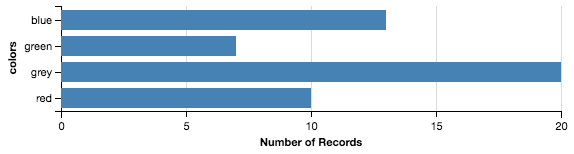

In [15]:
colors_df = pd.DataFrame(dict(colors=colors))
alt.Chart(colors_df).mark_bar().encode(
    y = 'colors',
    x = 'count(*)'
)

Again, we can get an estimate of the probability parameters $P_1,P_2,P_3,P_4$ using `.value_counts()`:

In [17]:
colors_df.colors.value_counts(normalize=True)

grey     0.40
blue     0.26
red      0.20
green    0.14
Name: colors, dtype: float64

### 1.3 Binomial distribution

The [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution) is another type of generalization of the Bernoulli distribution. The idea of the binomial distribution is to perform $n$ Bernoulli trials, each the probability of success $p$ and count how many success there are. It has the following properties:

* $x \sim B(n,p)$
* $p$ is the probability of *success* for each of the $n$ Bernoulli trials
* $x$ is the number of those Bernoulli trails that had an outcome of *success*
* $ E[x] = np $

Examples include:

* Number of successful free throws per game for a given basketball player.
* Number of heads in a series of coin tosses.

In [18]:
n = 10  # total number of trials
p = 0.2 # probability of success

The binomial distribution is implemented by `numpy.random.binomial`:

In [19]:
np.random.binomial(n, p)

2

In [21]:
x = np.random.binomial(n, p, 10)
x

array([0, 3, 2, 2, 2, 3, 3, 4, 1, 2])

Looking above, we see that the average of $x$ gives an estimation of $np$:

In [28]:
x.mean(), n*p

(2.2000000000000002, 2.0)

In [29]:
def plot_binomial(n, p, samples):
    counts = np.random.binomial(n, p, samples)
    plt.hist(counts, bins=np.arange(-0.5, 50.5, 0.5))
    plt.xlabel("Number of successes out of {} trials".format(n))
    plt.ylabel("Count")
    plt.xlim(0, 60);

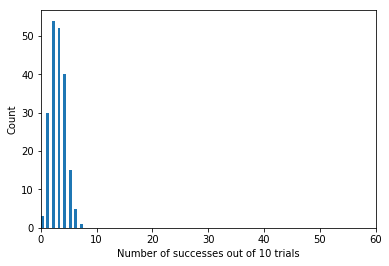

In [30]:
plot_binomial(10, 0.3, 200)

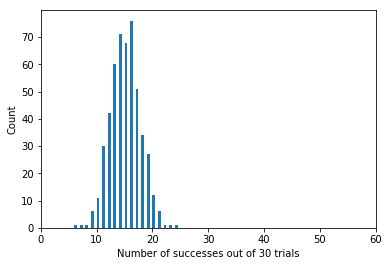

In [31]:
interact(plot_binomial, n=(10, 50, 10), p=(0.1, 0.9, 0.1), samples=(100,1000,100));

### 1.4 Poisson distribution

The [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) is used to model events that occur at a fixed average rate per unit time. It has the following properties:

* $ x \sim Poisson(\lambda) $
* $E[x]=\lambda = $ mean numbers of events per unit time
* $Var[x]=\lambda =$ variance in the distribution

Examples include:

* Number of goals by a team in a soccer game
* Number of photons hitting a camera's CCD sensor per second
* Number of email you get per day

In [32]:
λ = 1.0

In [33]:
np.random.poisson(λ)

0

In [34]:
x = np.random.poisson(λ, 20)
x

array([1, 0, 1, 0, 1, 1, 2, 1, 1, 0, 0, 1, 1, 2, 1, 1, 0, 0, 2, 1])

Both the mean and variance should be close to $\lambda=1.0$:

In [90]:
x.mean()

1.1000000000000001

In [91]:
x.var()

0.89000000000000024

In [38]:
def plot_poisson(λ, samples):
    x = np.random.poisson(λ, size=samples)
    plt.hist(x, bins=20)
    plt.xlabel("Number of events")
    plt.ylabel("Count")
    plt.xlim(0.0, 100.0)

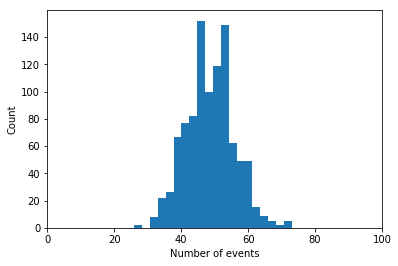

In [39]:
interact(plot_poisson, λ=(0, 100), samples=(100,1000,100));

## 2 Continuous probability distributions

In this notebook, we cover the following continuous probability distributions:

* Uniform
* Normal 
* Poisson 
* Exponential
* Beta
* Dirichlet

### 2.1 Uniform distribution

The <a href="https://en.wikipedia.org/wiki/Uniform_distribution_(continuous)">uniform distribution</a> returns random variates with equal probabilities in the interval $[a,b]$. It has he following properties:

* $X \sim U(a,b) $
* $X \in [a,b] $
* $E[X] = (a+b)/2$
* $var[X] = \frac{1}{12}(b-a)^2$

In [40]:
a = 0.0
b = 1.0

The uniform distribution is implemented by `numpy.random.uniform`:

In [41]:
np.random.uniform(a, b)

0.8491218811470895

In [42]:
x = np.random.uniform(a, b, size=50)
x

array([ 0.16434763,  0.80478323,  0.49635999,  0.562587  ,  0.34648664,
        0.76946922,  0.63553052,  0.35433787,  0.86172198,  0.84388088,
        0.10132737,  0.90814351,  0.23968955,  0.09417854,  0.24578966,
        0.12046703,  0.25268169,  0.79909627,  0.27083202,  0.20133366,
        0.62153916,  0.1075389 ,  0.01615567,  0.04836054,  0.54852369,
        0.87865268,  0.60109624,  0.16918192,  0.15317751,  0.96260525,
        0.0239119 ,  0.54638518,  0.49676374,  0.60055138,  0.01606149,
        0.3476235 ,  0.84544746,  0.14989699,  0.04112317,  0.13364237,
        0.07662573,  0.52678365,  0.70660572,  0.84738635,  0.39786915,
        0.51907987,  0.44322073,  0.49595112,  0.01950706,  0.09763651])

Let's check the relationships between the mean and variance and the $a$ and $b$ parameters:

In [48]:
x.mean(), (a+b)/2

(0.41023897719120689, 0.5)

In [49]:
x.var(), (b-a)**2/12

(0.085804347373684392, 0.08333333333333333)

### 2.2 Normal distribution

The [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) is one of the most important continuous probability distributions due to the [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem). It has the following properties:

* $X \sim N(\mu, \sigma^2)$
* $X \in [-\infty,\infty]$
* $E[X] = \mu$
* $var[X] = \sigma^2$

In [50]:
μ = 0.0
σ = 2.0

The normal distribution is implemented by `numpy.random.normal`. Note that this takes the standard deviation $\sigma$ rather than the variance as its second argument.

In [53]:
np.random.normal(μ, σ) # second argument is just sigma

0.7750214485088793

In [54]:
x = np.random.normal(μ, σ, size=50)
x

array([-0.4494752 , -2.69487832,  1.35693777,  3.57421171, -0.73784325,
       -2.80507307, -0.03556469,  1.96459766, -0.28839747,  1.94486516,
       -0.61503419, -1.01623166, -0.12349156, -2.84704798,  0.38815077,
        2.57527273,  0.71623859,  3.24108327, -3.42259661, -1.84707392,
       -2.73301709, -0.14817506, -1.37194387,  0.81533246, -1.09692274,
       -0.5394083 , -1.38635133, -1.18758251,  1.36080683, -1.46892906,
        2.94916725,  2.53768326, -0.16838604, -0.13285827,  1.82109337,
        0.99512281,  2.07757801, -0.01354418,  0.87550168, -1.18070396,
       -2.40666213, -1.00889076,  1.87443476, -3.37571117, -3.50970271,
       -0.228899  , -0.19964385, -0.85637475, -0.60133635,  0.72059211])

The mean and standard deviation are estimators for $\mu$ and $\sigma$:

In [59]:
x.mean(), μ

(-0.17418161662673959, 0.0)

In [60]:
x.std(), σ

(1.7874344771840092, 2.0)

It turns out that the standard deviation is not the best estimator for $\sigma$ in many cases. We will revisit that later.

A histogram is again an effective way of visualizing this distribution:

In [63]:
def plot_normal(μ, σ, samples):
    x = np.random.normal(μ, σ, size=samples)
    plt.hist(x, bins=20, normed=True);
    plt.xlim(-15.0, 15.0)
    plt.xlabel('x')
    plt.ylabel('P(x)')

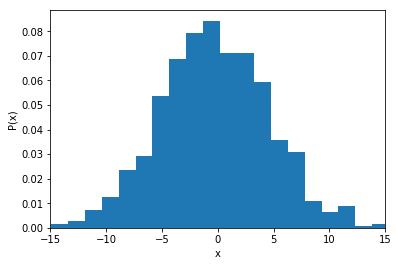

In [64]:
interact(plot_normal, μ=(-5.0,5.0), σ=(1.0, 5.0), samples=(100,1000,100));

### 2.3 Exponential distribution

The [exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution) is closely related to the Poisson distribution. Remember the Poisson distribution is based on the Poisson process: a series of events that occur at a fixed average rate per unit time. The Poisson distribution gives the number of events per unit time. The exponential distribution gives the time between those events. It has the following properties:

* $ t \sim Exp(\lambda) $
* $\lambda$ is the **rate parameter**, or average events per unit time
* $E[t] = 1/\lambda = \beta$ where $\beta$ is the **scale parameter**, or average time between events
* $Var[t] = \beta^2 $

In [68]:
β=2.0

The exponential distribution is implemented by `numpy.random.exponential(beta)`:

In [69]:
np.random.exponential(β)

3.178816475418736

In [70]:
t = np.random.exponential(β, size=50)
t

array([ 2.63875642,  1.20982286,  0.76655919,  1.13586725,  0.04074229,
        2.93425171,  2.88753067,  0.34836286,  2.17027427,  1.44820888,
        0.9989671 ,  3.69530254,  1.39264678,  0.02751504,  1.82599047,
        0.42061707,  3.03853931,  1.62024374,  2.08257121,  0.4131545 ,
        0.65780263,  1.12590196,  4.19754058,  4.47621206,  0.9828797 ,
        0.14667733,  2.87550632,  2.4564202 ,  0.65164966,  6.71563002,
        1.45569367,  0.80747268,  3.50366555,  3.38907549,  0.10296779,
        7.30410916,  2.11097576,  0.16799754,  3.33301828,  0.22975607,
        1.73212276,  2.92759613,  1.55164992,  4.08654929,  0.88895454,
        0.35721348,  0.84648617,  1.44456962,  1.70721017,  1.89240157])

In [71]:
def plot_exponential(β, samples):
    t = np.random.exponential(β, samples)
    plt.hist(t, bins=20, normed=True)
    plt.xlabel("t")
    plt.xlim(0.0, 50.0)

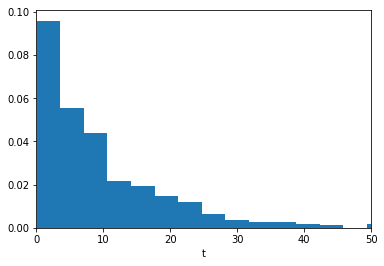

In [72]:
interact(plot_exponential, β=(1.0, 20.0), samples=(100,1000,100));

### 2.4 Beta distribution

Sometimes you need to build generative models that need probabilities that are themselves random variables. The [beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) is a probability distribution whose outcomes are probabilities. It has the following properties:

* $ x \sim Beta(\alpha, \beta) $
* $ x \in [0.0,1.0] $
* $ E[x] = \frac{\alpha}{\alpha+\beta} $
* $ Var[x] = \frac{\alpha \beta}{(\alpha+\beta)^2(\alpha+\beta+1)} $

In [73]:
α = 0.5
β = 2.0

The beta distribution is implemented by `numpy.random.beta(alpha, beta)`:

In [74]:
np.random.beta(α, β)

0.02235096338678375

In [77]:
x = np.random.beta(α, β, 50)
x

array([  5.54550799e-01,   5.99323284e-01,   5.08226342e-01,
         8.09957888e-01,   2.21534563e-01,   9.20539291e-02,
         4.23251326e-01,   2.73206175e-01,   3.46025409e-02,
         2.95917746e-02,   1.35992967e-01,   2.26832468e-02,
         5.93609193e-01,   4.48509960e-02,   3.82200782e-04,
         1.67095031e-02,   2.37078401e-02,   4.91155878e-01,
         1.13125823e-01,   8.15083149e-03,   3.48839389e-01,
         1.27488155e-01,   3.51824841e-01,   7.09029058e-02,
         1.38904509e-01,   3.66594344e-01,   7.35400633e-02,
         4.85552473e-02,   4.98046783e-02,   3.57337482e-01,
         4.43964543e-01,   1.78784598e-01,   6.36835666e-02,
         4.59320125e-02,   4.05654383e-01,   3.16688111e-01,
         3.69133367e-01,   5.00306929e-03,   2.53313748e-02,
         8.17422954e-02,   3.25681256e-01,   5.78092190e-02,
         1.12106967e-01,   7.23818510e-01,   4.35505177e-03,
         1.39219372e-01,   3.13753819e-01,   8.51092199e-02,
         2.38484403e-02,

In [78]:
def plot_beta(α, β, samples):
    x = np.random.beta(α, β, samples)
    plt.hist(x, bins=20, normed=True)
    plt.xlabel('x')
    plt.ylabel('P(x)')

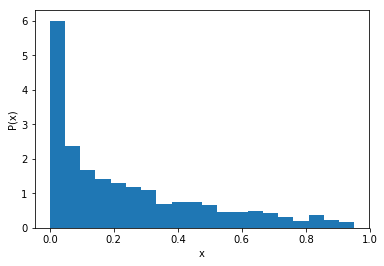

In [79]:
interact(plot_beta, α=(0.1, 5.0, 0.1), β=(0.1, 5.0, 0.1), samples=(100,1000,100));

The beta distribution is often used along with the binomial distribution in generative models. Recall that the binomial distribution $B(n,p)$ has an input parameter $p$ that is the probability of success in the Bernoulli trial. Here is a simple generative model where the $p$ variable in the binomial distribution is itself a beta distributed random variable:

$$ X_1 \sim Beta(0.5, 2.0) $$
$$ X_2 \sim B(100, X_1) $$

When a parameter in a probability distribution is itself a random variable, we call the model a *hierarchical model*. Here are `500` realizations of this hierarchical model:

In [91]:
X1 = np.random.beta(0.1, 2.0, 500)
X2 = np.array([np.random.choice([0,1],p=(p,1-p)) for p in X1])

These two random variables $X_1$ and $X_2$ are correlated, so we need to visualize their joint distribution. Seaborn has a very nice `jointplot` for this purpose:

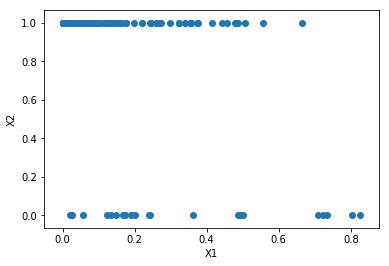

In [92]:
plt.scatter(X1, X2)
plt.xlabel('X1')
plt.ylabel('X2');

### 2.5 Dirichlet distribution

The [Dirichlet distribution](https://en.wikipedia.org/wiki/Dirichlet_distribution) is a multidimensional generalization of the beta distribution. Where the beta distribution returns a single probability, the Dirichlet distribution returns a vector of probabilities that are normalize to $1$. It has the following properties:

* $ \vec{x} \sim Dir(\vec{\alpha}) $
* $ x_i \in [0,1]$ is a vector of $k$ probabilities, such that $\sum_{i=1}^{k} x_i = 1 $
* $ \alpha_i $ is a vector of $k$ *concentrations* that parametrize the distribution

The Dirichlet distribution is implemented by `numpy.random.dirichlet` and takes a sequence of alpha values:

In [93]:
np.random.dirichlet(alpha=(0.1, 0.2))

array([ 0.6088404,  0.3911596])

Again, because the values returned by the distribution are two dimensional, we need to make a 2d scatterplot or joint distribution plot:

In [104]:
def plot_dirichlet(alpha1, alpha2, samples):
    x = np.random.dirichlet((alpha1, alpha2), samples)
    plt.scatter(x[:,0], x[:,1])
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

In the following visualization, notice how the points returned by the Dirichlet distribution lie on the line where $x_1 + x_2 = 1$.

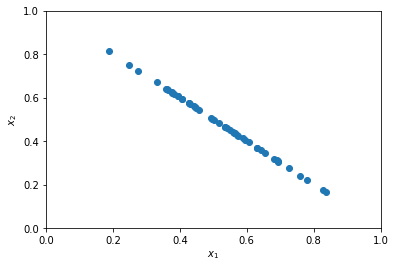

In [105]:
interact(plot_dirichlet, alpha1=(0.1, 10.0, 0.1), alpha2=(0.1, 10.0, 0.1), samples=(10,100,10));

The Dirichlet distribution is often paired with the categorical distribution in hierarchical models when the probabilities that go into the categorical distribution are themselves random variables. Here is a simple hierarchical model that does this:

$$ \vec{x}_1 \sim Dir([2.0, 2.0, 2.0]) $$

$$ x_2 \sim Categorical(\vec{x}_1) $$

In [106]:
x1 = np.random.dirichlet((2.0, 2.0, 2.0), size=100)
x2 = np.array([np.random.choice(['red', 'green', 'blue'], p=p) for p in x1])

In [108]:
x2_df = pd.DataFrame({'x2': x2})
x2_df.x2.value_counts()

red      45
blue     29
green    26
Name: x2, dtype: int64

## TensorFlow

[TensorFlow](https://www.tensorflow.org/) is a relatively new open-source library for machine learning. It was started by Google in November of 2015 and the 1.0 version was released in Feburary 2017. TensorFlow is a vast and powerful library; in this course we will only scratch the surface. My main motivation for introducing TensorFlow is that it provides a very different model of computing compared to the traditional numerical libraries in Python (NumPy, Pandas).

Here is the main idea:

Libraries such as NumPy, Pandas, SciPy:

* Only know about numbers, and multidimensional arrays (tensors) of numbers.
* Always compute the result of each expression immediately upon construction.
* Only runs a computation on the CPU of the local computer.

TensorFlow on the other hand:

* Separates the construction of an expression (or **computational graph**) from its running.
* Can run a computational graph multiple times on different inputs.
* Can run a computational graph on CPUs, GPUs, clusters or in the cloud.
* Offers abstract object that represent variables or tensors.

Let's see how this work by exploring a probability distribution. First import `tensorflow`:

In [33]:
import tensorflow as tf

Next **create Variable objects** for parameters. The first argument is their initial value, the second the dtype:

In [34]:
mu = tf.Variable(0.0, tf.float64)
sigma = tf.Variable(1.0, tf.float64)

Now let's import the `distributions` submodule that has different probability distributions:

In [35]:
from tensorflow.contrib import distributions as dist

Then we can build a normal distribution based on these parameters:

In [36]:
N = dist.Normal(mu, sigma)
N

At this point, the normal distribution hasn't actually computed anything. To compute any numerical results in TensorFlow, we need to:

* Create a `Session`
* Create an object for initializing any `Variable` instances
* Run the initialization object

These steps are performed here:

In [37]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

Once this initalization has been performed, you can run different calculations:

In [39]:
sess.run(N.sample(10))

array([-0.28471422, -1.22629058,  0.80350655,  0.42642382, -0.94055486,
       -0.24847141, -1.72471368, -1.87664688, -0.59302413,  0.09190883], dtype=float32)

The `.run()` method also takes a second argument where you can pass in updated values of variables:

In [42]:
sess.run(N.sample(10), {mu: 1.0, sigma: 2.0})

array([ 1.6983242 ,  0.08049154,  0.62661022, -0.53246081,  3.85624242,
        0.93040109,  2.90378928,  2.47856998,  0.16079301,  0.84702545], dtype=float32)

We can now evaluate the PDF at a particular $x$ value for a particular set of parameters:

In [40]:
sess.run(N.pdf(0.1), {mu: 1.0, sigma: 2.0})

0.18026347

This is a very basic example using TensorFlow, but the patterns used here are the same in any TensorFlow based calculation:

* Create `Variable` instances for parameters.
* Construct a computational graph.
* Create and initialize a `Session`.
* Run the graph in the session.